In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from datetime import datetime 
from sklearn.metrics import roc_auc_score as auc 
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [3]:
df = pd.read_csv('Data/X_train_test_CombinedCategories.csv')

In [4]:
pd.options.display.max_columns = 999
df1 = df.groupby('Provider Type').transform(lambda x: (x - x.mean()) / x.std())

train_x = df1.iloc[:,1:].values

In [27]:
# Parameters
learning_rate = 0.0005
training_epochs = 150
batch_size = 1024
display_step = 1

# Network Parameters
n_hidden_1 = 15 # 1st layer num features
#n_hidden_2 = 15 # 2nd layer num features
n_input = train_x.shape[1] # MNIST data input (img shape: 28*28)
data_dir = '.'

In [28]:
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    #'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
    #'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    #'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_input])),
    #'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    #layer_2 = tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   #biases['encoder_b2']))
    return layer_1


# Building the decoder
def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    #layer_2 = tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                  # biases['decoder_b2']))
    return layer_1

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define batch mse
batch_mse = tf.reduce_mean(tf.pow(y_true - y_pred, 2), 1)

# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# TRAIN StARTS
save_model = os.path.join(data_dir, 'temp_saved_model_1layer.ckpt')
saver = tf.train.Saver()

# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    now = datetime.now()
    sess.run(init)
    total_batch = int(train_x.shape[0]/batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_idx = np.random.choice(train_x.shape[0], batch_size)
            batch_xs = train_x[batch_idx]
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        
        
        # Display logs per epoch step
        if epoch % display_step == 0:
            train_batch_mse = sess.run(batch_mse, feed_dict={X: train_x})
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c), 
                  #"Train auc=", "{:.6f}".format(auc(train_y, train_batch_mse)), 
                  "Time elapsed=", "{}".format(datetime.now() - now))

    print("Optimization Finished!")
    
    save_path = saver.save(sess, save_model)
    print("Model saved in file: %s" % save_path)

Epoch: 0001 cost= 1.811736584 Time elapsed= 0:00:01.469811
Epoch: 0002 cost= 1.437579751 Time elapsed= 0:00:01.566980
Epoch: 0003 cost= 1.577134252 Time elapsed= 0:00:01.668857
Epoch: 0004 cost= 1.493493438 Time elapsed= 0:00:01.792512
Epoch: 0005 cost= 1.607101679 Time elapsed= 0:00:01.891868
Epoch: 0006 cost= 1.266075373 Time elapsed= 0:00:01.991523
Epoch: 0007 cost= 1.460443974 Time elapsed= 0:00:02.110778
Epoch: 0008 cost= 1.628917456 Time elapsed= 0:00:02.213614
Epoch: 0009 cost= 1.466831923 Time elapsed= 0:00:02.308199
Epoch: 0010 cost= 2.039290667 Time elapsed= 0:00:02.439697
Epoch: 0011 cost= 1.279381633 Time elapsed= 0:00:02.538905
Epoch: 0012 cost= 1.488589883 Time elapsed= 0:00:02.635941
Epoch: 0013 cost= 1.229589343 Time elapsed= 0:00:02.758672
Epoch: 0014 cost= 1.159185767 Time elapsed= 0:00:02.868372
Epoch: 0015 cost= 1.208297849 Time elapsed= 0:00:02.991187
Epoch: 0016 cost= 1.242755175 Time elapsed= 0:00:03.101496
Epoch: 0017 cost= 1.608197808 Time elapsed= 0:00:03.2021

Epoch: 0140 cost= 0.635331213 Time elapsed= 0:00:21.205321
Epoch: 0141 cost= 0.446963012 Time elapsed= 0:00:21.402580
Epoch: 0142 cost= 0.384331077 Time elapsed= 0:00:21.680574
Epoch: 0143 cost= 0.592375457 Time elapsed= 0:00:21.981738
Epoch: 0144 cost= 0.391087890 Time elapsed= 0:00:22.137574
Epoch: 0145 cost= 0.428010404 Time elapsed= 0:00:22.273089
Epoch: 0146 cost= 0.559345841 Time elapsed= 0:00:22.390846
Epoch: 0147 cost= 0.446429968 Time elapsed= 0:00:22.577581
Epoch: 0148 cost= 0.448860705 Time elapsed= 0:00:22.701249
Epoch: 0149 cost= 0.802969456 Time elapsed= 0:00:22.819220
Epoch: 0150 cost= 0.373167038 Time elapsed= 0:00:22.949936
Optimization Finished!
Model saved in file: ./temp_saved_model_1layer.ckpt


In [7]:
save_model = os.path.join(data_dir, 'temp_saved_model_1layer.ckpt')
saver = tf.train.Saver()

# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    now = datetime.now()
    
    saver.restore(sess, save_model)
    
    train_batch_mse = sess.run(batch_mse, feed_dict={X: train_x})
    
    #print("Test auc score: {:.6f}".format(auc(test_y, test_batch_mse))



INFO:tensorflow:Restoring parameters from ./temp_saved_model_1layer.ckpt


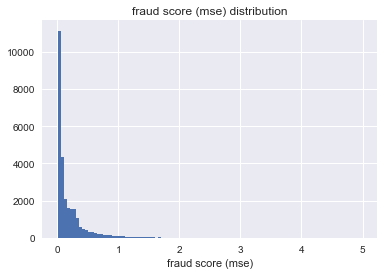

In [8]:
plt.hist(train_batch_mse[(train_batch_mse < 5)], bins = 100)
plt.title("fraud score (mse) distribution")
plt.xlabel("fraud score (mse)")
plt.show()

In [9]:
print(np.max(train_batch_mse))
print(np.average(train_batch_mse))

316.269
0.476195


In [10]:
#risk = (train_batch_mse - np.average(train_batch_mse))/np.std(train_batch_mse)
#risk

In [12]:
import pandas as pd
output = pd.DataFrame()
output['Doctor Identifier'] = df['Doctor Identifier'].values[:18000]
output['Risk'] = train_batch_mse[:18000]
output.to_csv("outputs/autoencoder.csv", index=False)

In [13]:
len(output)

18000